# using vcentre to adjust colorbar limits

**I want to use a divergent colormap, but the neutral color isn't in the middle of my ticks. What can I do to align the centre of the colormap to zero?**

When we plot anomalies, it is best to use divergent colormaps. However, some climate change signals are highly skewed or only in one direction. For example, heat hazards are nearly always increasing. To use divergent colormaps, but not waste space in the color scale on large cool anomalies, we can use the "vcentre" key word to centre the neutral centre of the colormap at zero, but only show relevant ticks on the scale.



In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
# import ACS plotting maps and Xarray.
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from acs_plotting_maps import *
import xarray as xr

CPU times: user 40 s, sys: 1.18 s, total: 41.1 s
Wall time: 42.7 s


(<Figure size 1000x400 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

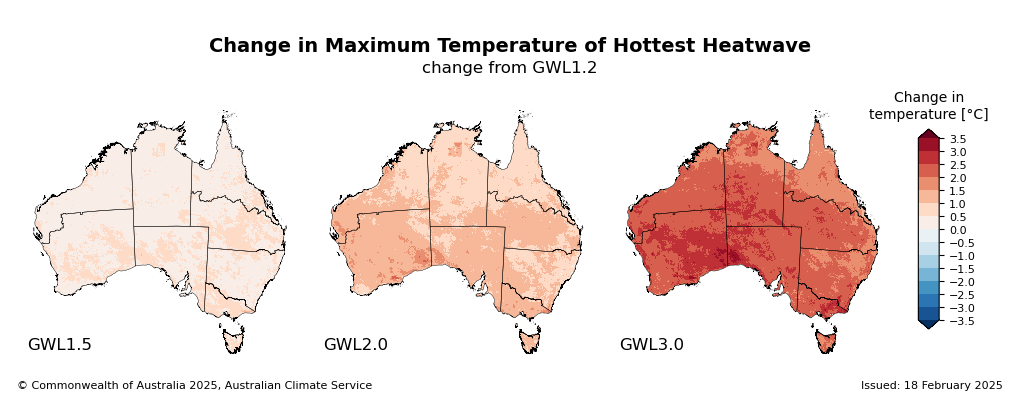

In [3]:
%%time
var = "HWAtx"

ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var] -ds_gwl12[var], 
                    ds_gwl20 = ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30 = ds_gwl30[var] -ds_gwl12[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Change in\ntemperature [\N{DEGREE SIGN}C]",
                    title=f"Change in Maximum Temperature of Hottest Heatwave", 
                    date_range = "change from GWL1.2", 
                    watermark="", 
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-3.5,3.51,0.5),
)

CPU times: user 4.84 s, sys: 41.2 ms, total: 4.89 s
Wall time: 4.9 s


(<Figure size 1000x400 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

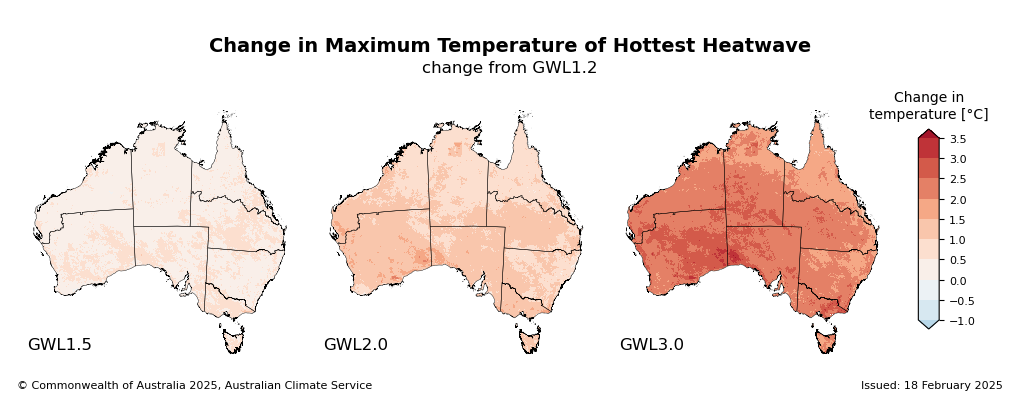

In [4]:
%%time
#same as above, but fewer ticks and set vcentre
var = "HWAtx"

ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var] -ds_gwl12[var], 
                    ds_gwl20 = ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30 = ds_gwl30[var] -ds_gwl12[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Change in\ntemperature [\N{DEGREE SIGN}C]",
                    title=f"Change in Maximum Temperature of Hottest Heatwave", 
                    date_range = "change from GWL1.2", 
                    watermark="", 
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-1.0,3.51,0.5), # changed ticks
                    vcentre = 0,                      # new key word
)                     